In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv("/content/HousingData.csv")

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
print("The shape of the data is: ")
data.shape

The shape of the data is: 


(506, 14)

In [ ]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
data.MEDV

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
import seaborn as sns

<Axes: xlabel='RM', ylabel='MEDV'>

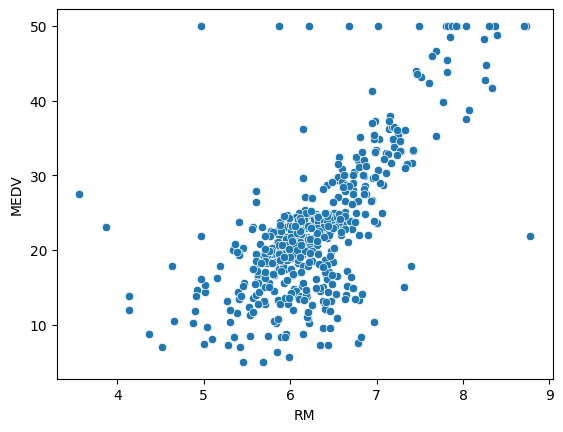

In [ ]:
sns.scatterplot(x = 'RM',y = 'MEDV',data = data)

In [ ]:
for col in data.columns:
  data[col].fillna(value=data[col].mean(), inplace=True)

In [ ]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: xlabel='RM', ylabel='Count'>

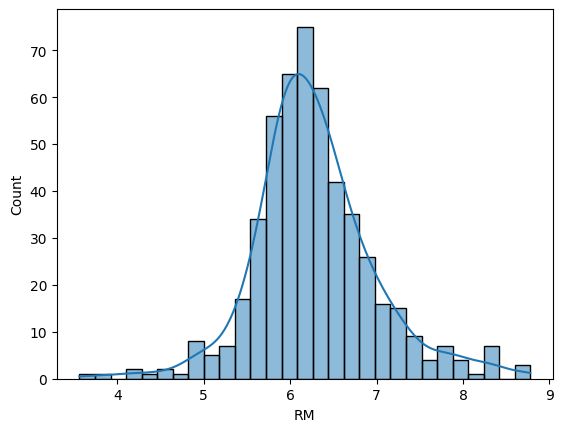

In [ ]:
sns.histplot(x='RM',data=data,kde=True)

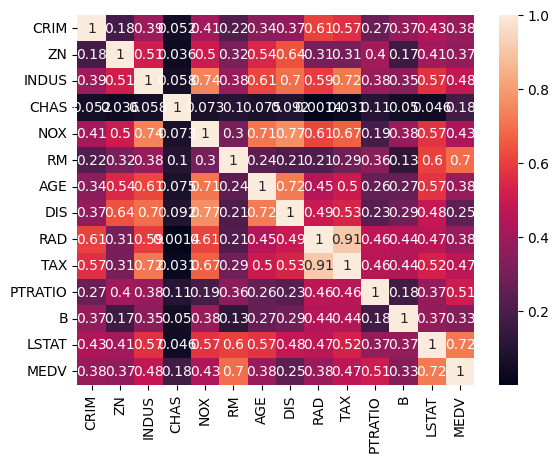

<Figure size 2000x1000 with 0 Axes>

In [ ]:
sns.heatmap(data.corr().abs(),annot=True)
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
X = data[['RM']]
X[:300]

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
295,6.678
296,6.549
297,5.790
298,6.345


In [ ]:
y = data['MEDV']
y[:300]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
295    28.6
296    27.1
297    20.3
298    22.5
299    29.0
Name: MEDV, Length: 300, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(X,y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(xtrain ,ytrain)

LinearRegression()

In [ ]:
model.predict([[7.147]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.53682906])

In [ ]:
test_data = [[5.983],[5.926],[6.312],[7.061]]
test_data

[[5.983], [5.926], [6.312], [7.061]]

In [ ]:
model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.62271772, 19.08826381, 22.70754816, 29.73046001])

In [ ]:
y_pred = model.predict(test_data)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.62271772, 19.08826381, 22.70754816, 29.73046001])

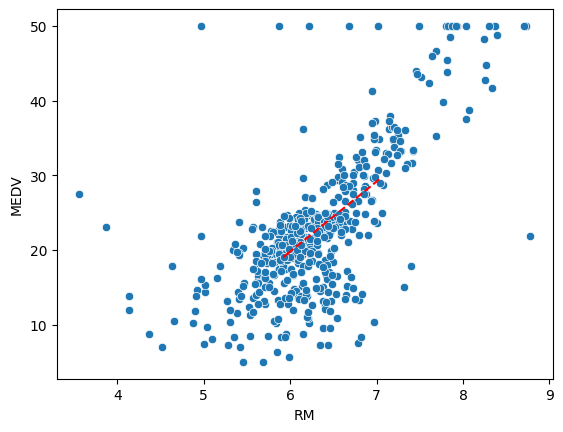

In [ ]:
sns.scatterplot(x = 'RM',y = 'MEDV',data = data)
plt.plot(test_data,y_pred,'r--')

In [ ]:
model.score(X,y)*100

48.30070551790612

In [ ]:
x = 5
m = model.coef_
m

array([9.37638431])

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)
df=pd.DataFrame(ytrain_pred,ytrain)
df=pd.DataFrame(ytest_pred,ytest)
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,ytest_pred)
print(mse)
mse=mean_squared_error(ytrain_pred,ytrain)
print(mse)

46.90735162739531
42.82047894172751
